Objective: Train a sentiment classifier on a corpus of the provided documents. Your goal is to maximize accuracy. There is special interest in being able to accurately detect negative sentiment. The training data includes documents from a wide variety of sources, not merely social media, and some of it may be inconsistently labeled. Please describe the business outcomes in your work sample including how data limitations impact your results and how these limitations could be addressed in a larger project.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from data_prep import (X_train_scale, y_train,
                       X_test_scale, y_test,
                       train_vectors, test_vectors)
from stopwords import STOPWORDS

In [20]:
train_vectors

<15171x27572 sparse matrix of type '<class 'numpy.int64'>'
	with 177646 stored elements in Compressed Sparse Row format>

In [22]:
X_train_scale

array([[-0.02462044, -0.20688858, -0.24028147, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.39888569, -0.39376642, -0.24028147, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.47373874, -0.48720534, -0.24028147, ..., -0.00811909,
        -0.00811909, -0.00811909],
       ...,
       [-0.17432654, -0.11344967,  0.34324826, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [ 0.87361616,  0.82093952,  0.92677799, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [ 0.94846921,  1.19469519,  0.34324826, ..., -0.00811909,
        -0.00811909, -0.00811909]])

In [3]:
log_clf = LogisticRegression(random_state=0)

In [4]:
log_clf.fit(train_vectors, y_train) 
# train vectors is before we merge it with meta features

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix
[[ 648  535  139]
 [ 195 1821  216]
 [ 138  452  913]]


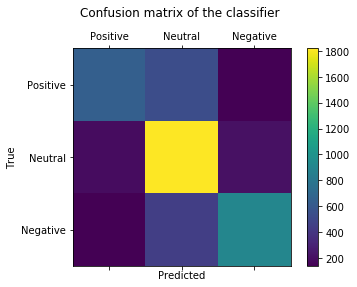

Accuracy is 0.6687759541229978 


In [6]:
y_pred = log_clf.predict(test_vectors)
cm = confusion_matrix(y_test , y_pred)
print("Confusion Matrix")
print(cm)
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

In [8]:
scores = cross_val_score(log_clf, train_vectors, y_train, cv=5, scoring="accuracy")

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
scores

array([0.65107084, 0.64798945, 0.64667106, 0.65062624, 0.64897825])

Data limitations:

-- Lack of full stopwords list

Submit your work sample as a single pdf or html file that is comprehensive with respect to your thought process, code, findings, and recommendations (ie a notebook). You may submit other documents if you wish, but compressed files will not be accepted.